<a href="https://colab.research.google.com/github/BBloxham1/is4487/blob/main/Copy_of_lab12_retailer_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 7 with the *SuperStore Retail Orders* dataset

In this lab, your assignment is to do a regression model to predict sales revenue.  You can focus your efforts on predicting sales by month and product line.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab12_retailer_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email


PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt


from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
df = pd.read_csv('superstore_retail_orders.csv')
df.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Create any needed variables, such as month of year and total_amount.  
- Filter out any incomplete orders

In [3]:
df_clean = df.copy()

# check for invalid dates in data
df_clean[(df_clean['order_date'] > '2024-06-30')]
df_clean[(df_clean['order_date'] < '2010-01-01')]
df_clean[(df_clean['order_year_month'] > '2024-06')]
df_clean[(df_clean['order_year_month'] < '2010-01-01')]

# remove invalid dates
df_clean = df_clean[(df_clean['order_date'] < '2024-06-30') & (df_clean['order_year_month'] < '2024-06')]
df_clean = df_clean[(df_clean['order_date'] > '2010-01-01') & (df_clean['order_year_month'] > '2010-01-01')]

df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
df_clean['order_year_month'] = df_clean['order_date'].dt.strftime('%Y-%m')

df_clean['month'] = pd.DatetimeIndex(df_clean['order_year_month']).month
df_clean['year'] = pd.DatetimeIndex(df_clean['order_year_month']).year
df_clean['total_amount'] = df_clean['quantity'] * df_clean['product_price']
df_clean.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,month,year,total_amount
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,7,2023,1949.97
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,7,2023,2599.96
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,7,2023,3249.95
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,7,2023,649.99
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,7,2023,649.99


In [4]:
#filter records
df_clean.dropna(inplace=True)

In [ ]:
df_clean.columns

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'email', 'order_type', 'quantity', 'product_name',
       'product_line', 'product_price', 'product_status', 'month', 'year',
       'total_amount'],
      dtype='object')

## Visualize Data

➡️ Assignment Tasks
- Create at least 2 plots showing total revenue (quantity * price) by other variables (see Lab 7).

Text(0.5, 1.0, 'Revenue by Month')

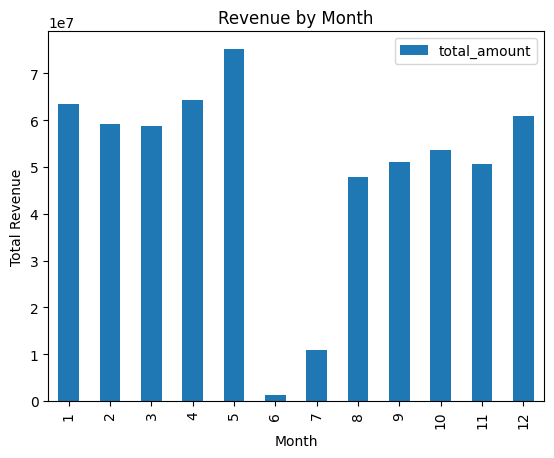

In [ ]:
#plots

#revenue by month
revenue_by_month = df_clean[['total_amount', 'month']].groupby(['month']).sum()
revenue_by_month.plot.bar()
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Revenue by Month')

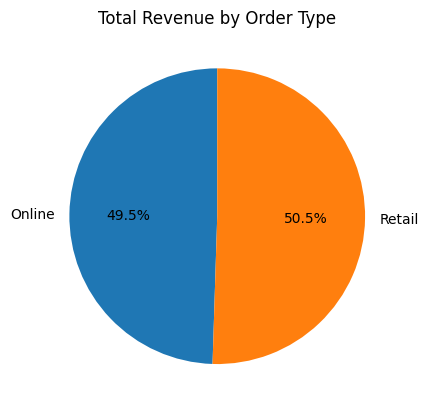

In [ ]:
order_type_revenue = df_clean.groupby('order_type')['total_amount'].sum()
plt.pie(order_type_revenue, labels=order_type_revenue.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue by Order Type')
plt.show()


## Regression

For more info on regression models, see: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use ONLY ONE of the independent variables, such as month of the year
- Output your coefficients

In [6]:
# Assuming 'df_clean' is your DataFrame with 'total_amount' and 'month'

# Prepare the data
X = df_clean[['month']]
y = df_clean['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (optional)
# You can use metrics like R-squared, Mean Squared Error, etc.
# from sklearn.metrics import r2_score
# print("R-squared:", r2_score(y_test, y_pred))

Intercept: 11871.980268254809
Coefficient for month: -22.50044235139704


In [7]:
#display coefficients
print("Coefficient for month:", model.coef_[0])

Coefficient for month: -22.50044235139704


In [8]:
df_clean.columns

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'email', 'order_type', 'quantity', 'product_name',
       'product_line', 'product_price', 'product_status', 'month', 'year',
       'total_amount'],
      dtype='object')

## Regression - Improved

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use at least two more independent variables (see varabiables from Lab 7)
- Output your coefficients
- Did your R2 value improve (better fit)?

In [12]:
#create model

# Prepare the data
X = df_clean[['product_price','product_line']]
y = df_clean['total_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'Bikes'

In [ ]:
#display coefficients

In [ ]:
#compare models

## One-Hot Product

➡️ Assignment Tasks
- Create one-hot/dummy encoding for the product line variable.  Use those new encoded variables for the regression

In [ ]:
#create variable

In [ ]:
#create model

In [ ]:
#display coefficients